In [61]:
#%load earthquake_producer.py

In [62]:
#%load earthquake_consumer_mysql.py

In [63]:
#%run earthquake_producer.py

In [64]:
#%run earthquake_consumer_mysql.py

In [65]:
import mysql.connector as connection
import os
from dotenv import load_dotenv
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  

In [66]:
# Config to db
dotenv_path = Path('/home/marloe.uy/repos/statnett/mysql.env')
load_dotenv(dotenv_path=dotenv_path)

MYSQL_USER = "mydb_user"
MYSQL_PASSWORD = os.environ.get('MYSQL_PASSWORD')
MYSQL_HOST = "172.21.0.102"
MYSQL_DATABASE = "statnett"

In [67]:
mydb = connection.connect(
        host=MYSQL_HOST,
        user=MYSQL_USER,
        password=MYSQL_PASSWORD,
        database=MYSQL_DATABASE, use_pure=True
    )
#cursor = mydb.cursor()
try:
    sql = "SELECT * FROM earthquake;"
    result_df = pd.read_sql_query(sql, mydb)
    #earthquake = cursor.fetchall()
finally:
    mydb.close()

/tmp/ipykernel_1270378/3816875255.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_df = pd.read_sql_query(sql, mydb)


In [73]:
# Get the top 10 earthquake by magnitude
result_df.sort_values(by=['magnitude'], ascending=False)[["place", "magnitude", "tsunami"]][:10]

place  magnitude  tsunami
39                  Pulau Pulau Tanimbar, Indonesia        7.6        0
69                  23 km WNW of Port-Olry, Vanuatu        7.0        1
2                        southern East Pacific Rise        6.0        0
113                       south of the Fiji Islands        5.9        0
127                  43 km SSW of Jurm, Afghanistan        5.9        0
9                                           Vanuatu        5.8        0
28                  18 km ENE of Port-Olry, Vanuatu        5.7        0
5                                      Tonga region        5.6        0
38                    Kepulauan Tanimbar, Indonesia        5.4        0
126  160 km SW of La Esperanza (El Zapotal), Mexico        5.3        0

In [71]:
# Get all earthquakes that has a tsunami associated
result_df[result_df['tsunami'] == 1 ]

id  magnitude                            place                time  \
11  12        4.5     100 km NW of Yakutat, Alaska 2023-01-11 08:00:47   
15  16        5.0  201 km SE of Perryville, Alaska 2023-01-10 20:42:03   
69  70        7.0  23 km WNW of Port-Olry, Vanuatu 2023-01-08 13:32:42   

    country  tsunami  
11   Alaska        1  
15   Alaska        1  
69  Vanuatu        1

In [72]:
# Get top 10 countries with most earthquake
result_df['country'].value_counts()[:10]

Indonesia                        13
Vanuatu                          12
Japan                             9
Chile                             9
Argentina                         6
Taiwan                            5
Greece                            5
South Sandwich Islands region     4
Fiji region                       4
Peru                              4
Name: country, dtype: int64

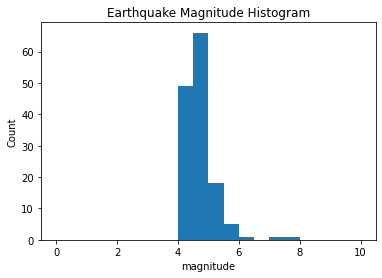

In [70]:
def plot_data(data):
    # Create a histogram of the earthquake magnitudes
    plt.hist(data, bins=20, range=(0, 10))
    plt.xlabel("magnitude")
    plt.ylabel("Count")
    plt.title("Earthquake Magnitude Histogram")
    plt.show()

plot_data(result_df['magnitude'])